In [1]:
import pandas as pd
import numpy as np

In [2]:
passenger_df = pd.read_csv("airline-passengers.csv")
passenger_df

,Date,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
type(passenger_df["Date"][0])

str

In [4]:
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"])

In [5]:
type(passenger_df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
passenger_df["month"] = passenger_df["Date"].dt.month
passenger_df["day"] = passenger_df["Date"].dt.day
passenger_df["day_name"] = passenger_df["Date"].dt.day_name()
passenger_df.head()

,Date,#Passengers,month,day,day_name
0,1949-01-01,112,1,1,Saturday
1,1949-02-01,118,2,1,Tuesday
2,1949-03-01,132,3,1,Tuesday
3,1949-04-01,129,4,1,Friday
4,1949-05-01,121,5,1,Sunday


In [8]:
passenger_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("sum")
passenger_per_month = passenger_per_month.reset_index()
passenger_per_month

,month,#Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262
5,6,3740
6,7,4216
7,8,4213
8,9,3629
9,10,3199


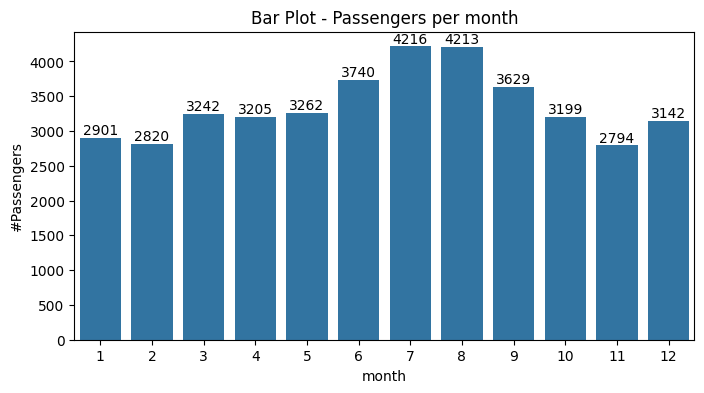

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

ax = sns.barplot(x="month", y="#Passengers",data=passenger_per_month)
ax.set_title("Bar Plot - Passengers per month")

for p,v in zip(ax.patches, passenger_per_month["#Passengers"]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width() / 2, height + 5, v,
            ha = 'center', va='bottom')

plt.show()

In [10]:
mean_passengers_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("mean").reset_index()
mean_passengers_per_month

,month,#Passengers
0,1,241.750000
1,2,235.000000
2,3,270.166667
3,4,267.083333
4,5,271.833333
5,6,311.666667
6,7,351.333333
7,8,351.083333
8,9,302.416667
9,10,266.583333


In [11]:
median_passengers_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("median").reset_index()
median_passengers_per_month

,month,#Passengers
0,1,223.0
1,2,214.5
2,3,251.5
3,4,252.0
4,5,252.0
5,6,289.5
6,7,333.0
7,8,320.0
8,9,285.5
9,10,251.5
